In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## New Section

In [2]:
data = pd.read_excel("waste_data_ffilled.xlsx")
data

,Unnamed: 0,Dump Date,waste weight,precipitation_sum,precipitation_hours
0,0,2020-10-05,2000,0.4,4.0
1,1,2020-10-06,1250,3.9,13.0
2,2,2020-10-07,980,0.9,2.0
3,3,2020-10-08,980,0.9,5.0
4,4,2020-10-09,1760,3.4,10.0
...,...,...,...,...,...
1456,1456,2024-09-24,610,10.3,NaN
1457,1457,2024-09-25,840,6.3,NaN
1458,1458,2024-09-26,980,2.6,NaN
1459,1459,2024-09-27,940,8.8,NaN


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,Dump Date,waste weight,precipitation_sum,precipitation_hours
0,2020-10-05,2000,0.4,4.0
1,2020-10-06,1250,3.9,13.0
2,2020-10-07,980,0.9,2.0
3,2020-10-08,980,0.9,5.0
4,2020-10-09,1760,3.4,10.0
...,...,...,...,...
1456,2024-09-24,610,10.3,NaN
1457,2024-09-25,840,6.3,NaN
1458,2024-09-26,980,2.6,NaN
1459,2024-09-27,940,8.8,NaN


In [4]:
waste_weight = data.drop(columns=['precipitation_sum', 'precipitation_hours'])
waste_weight

,Dump Date,waste weight
0,2020-10-05,2000
1,2020-10-06,1250
2,2020-10-07,980
3,2020-10-08,980
4,2020-10-09,1760
...,...,...
1456,2024-09-24,610
1457,2024-09-25,840
1458,2024-09-26,980
1459,2024-09-27,940


In [5]:
patient_counts = {
    'Quarter': ['2023Q1', '2023Q2', '2023Q3', '2023Q4'],
    'Total Patients': [301206, 310374, 319841, 321002],
}

In [6]:
waste_weight = waste_weight[
    (waste_weight['Dump Date'] >= '2023-01-01') &
    (waste_weight['Dump Date'] <= '2023-12-31')
]
waste_weight

,Dump Date,waste weight
824,2023-01-01,990
825,2023-01-02,1210
826,2023-01-03,1230
827,2023-01-04,1230
828,2023-01-05,1190
...,...,...
1184,2023-12-27,1310
1185,2023-12-28,1550
1186,2023-12-29,1760
1187,2023-12-30,1340


In [7]:
waste_weight['quarter'] = waste_weight['Dump Date'].dt.to_period('Q')
waste_weight

<ipython-input-7-692a3876344b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_weight['quarter'] = waste_weight['Dump Date'].dt.to_period('Q')


,Dump Date,waste weight,quarter
824,2023-01-01,990,2023Q1
825,2023-01-02,1210,2023Q1
826,2023-01-03,1230,2023Q1
827,2023-01-04,1230,2023Q1
828,2023-01-05,1190,2023Q1
...,...,...,...
1184,2023-12-27,1310,2023Q4
1185,2023-12-28,1550,2023Q4
1186,2023-12-29,1760,2023Q4
1187,2023-12-30,1340,2023Q4


In [8]:
quarterly_waste_totals = waste_weight.groupby('quarter')['waste weight'].sum()
quarterly_waste_totals

,waste weight
quarter,
2023Q1,106350
2023Q2,107260
2023Q3,129210
2023Q4,110890


In [9]:
patient_df = pd.DataFrame(patient_counts)

In [10]:
patient_df

,Quarter,Total Patients
0,2023Q1,301206
1,2023Q2,310374
2,2023Q3,319841
3,2023Q4,321002


In [11]:
waste_weight['quartly waste weight'] = waste_weight['quarter'].map(quarterly_waste_totals)
waste_weight

<ipython-input-11-3387f7f2364c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_weight['quartly waste weight'] = waste_weight['quarter'].map(quarterly_waste_totals)


,Dump Date,waste weight,quarter,quartly waste weight
824,2023-01-01,990,2023Q1,106350
825,2023-01-02,1210,2023Q1,106350
826,2023-01-03,1230,2023Q1,106350
827,2023-01-04,1230,2023Q1,106350
828,2023-01-05,1190,2023Q1,106350
...,...,...,...,...
1184,2023-12-27,1310,2023Q4,110890
1185,2023-12-28,1550,2023Q4,110890
1186,2023-12-29,1760,2023Q4,110890
1187,2023-12-30,1340,2023Q4,110890


In [12]:
waste_weight['proportion'] = waste_weight['waste weight'] / waste_weight['quartly waste weight']
waste_weight

<ipython-input-12-2b342f7bb08d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_weight['proportion'] = waste_weight['waste weight'] / waste_weight['quartly waste weight']


,Dump Date,waste weight,quarter,quartly waste weight,proportion
824,2023-01-01,990,2023Q1,106350,0.009309
825,2023-01-02,1210,2023Q1,106350,0.011378
826,2023-01-03,1230,2023Q1,106350,0.011566
827,2023-01-04,1230,2023Q1,106350,0.011566
828,2023-01-05,1190,2023Q1,106350,0.011189
...,...,...,...,...,...
1184,2023-12-27,1310,2023Q4,110890,0.011814
1185,2023-12-28,1550,2023Q4,110890,0.013978
1186,2023-12-29,1760,2023Q4,110890,0.015872
1187,2023-12-30,1340,2023Q4,110890,0.012084


In [13]:
waste_weight['quarter'] = waste_weight['quarter'].astype(str)
patient_df['Quarter'] = patient_df['Quarter'].astype(str)

<ipython-input-13-df33acf9919a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  waste_weight['quarter'] = waste_weight['quarter'].astype(str)


In [14]:
waste_weight = pd.merge(waste_weight, patient_df[['Quarter', 'Total Patients']],
                            left_on='quarter', right_on='Quarter',
                            how='left')

waste_weight.rename(columns={'Total Patients': 'quarterly_patient_count'}, inplace=True)

waste_weight

,Dump Date,waste weight,quarter,quartly waste weight,proportion,Quarter,quarterly_patient_count
0,2023-01-01,990,2023Q1,106350,0.009309,2023Q1,301206
1,2023-01-02,1210,2023Q1,106350,0.011378,2023Q1,301206
2,2023-01-03,1230,2023Q1,106350,0.011566,2023Q1,301206
3,2023-01-04,1230,2023Q1,106350,0.011566,2023Q1,301206
4,2023-01-05,1190,2023Q1,106350,0.011189,2023Q1,301206
...,...,...,...,...,...,...,...
360,2023-12-27,1310,2023Q4,110890,0.011814,2023Q4,321002
361,2023-12-28,1550,2023Q4,110890,0.013978,2023Q4,321002
362,2023-12-29,1760,2023Q4,110890,0.015872,2023Q4,321002
363,2023-12-30,1340,2023Q4,110890,0.012084,2023Q4,321002


In [15]:
waste_weight['daily patients'] = waste_weight['quarterly_patient_count'] * waste_weight['proportion']

waste_weight

,Dump Date,waste weight,quarter,quartly waste weight,proportion,Quarter,quarterly_patient_count,daily patients
0,2023-01-01,990,2023Q1,106350,0.009309,2023Q1,301206,2803.892243
1,2023-01-02,1210,2023Q1,106350,0.011378,2023Q1,301206,3426.979408
2,2023-01-03,1230,2023Q1,106350,0.011566,2023Q1,301206,3483.623695
3,2023-01-04,1230,2023Q1,106350,0.011566,2023Q1,301206,3483.623695
4,2023-01-05,1190,2023Q1,106350,0.011189,2023Q1,301206,3370.335120
...,...,...,...,...,...,...,...,...
360,2023-12-27,1310,2023Q4,110890,0.011814,2023Q4,321002,3792.159978
361,2023-12-28,1550,2023Q4,110890,0.013978,2023Q4,321002,4486.906845
362,2023-12-29,1760,2023Q4,110890,0.015872,2023Q4,321002,5094.810353
363,2023-12-30,1340,2023Q4,110890,0.012084,2023Q4,321002,3879.003337


In [16]:
waste_weight['daily patients'] = waste_weight['daily patients'].astype(int)
waste_weight

,Dump Date,waste weight,quarter,quartly waste weight,proportion,Quarter,quarterly_patient_count,daily patients
0,2023-01-01,990,2023Q1,106350,0.009309,2023Q1,301206,2803
1,2023-01-02,1210,2023Q1,106350,0.011378,2023Q1,301206,3426
2,2023-01-03,1230,2023Q1,106350,0.011566,2023Q1,301206,3483
3,2023-01-04,1230,2023Q1,106350,0.011566,2023Q1,301206,3483
4,2023-01-05,1190,2023Q1,106350,0.011189,2023Q1,301206,3370
...,...,...,...,...,...,...,...,...
360,2023-12-27,1310,2023Q4,110890,0.011814,2023Q4,321002,3792
361,2023-12-28,1550,2023Q4,110890,0.013978,2023Q4,321002,4486
362,2023-12-29,1760,2023Q4,110890,0.015872,2023Q4,321002,5094
363,2023-12-30,1340,2023Q4,110890,0.012084,2023Q4,321002,3879


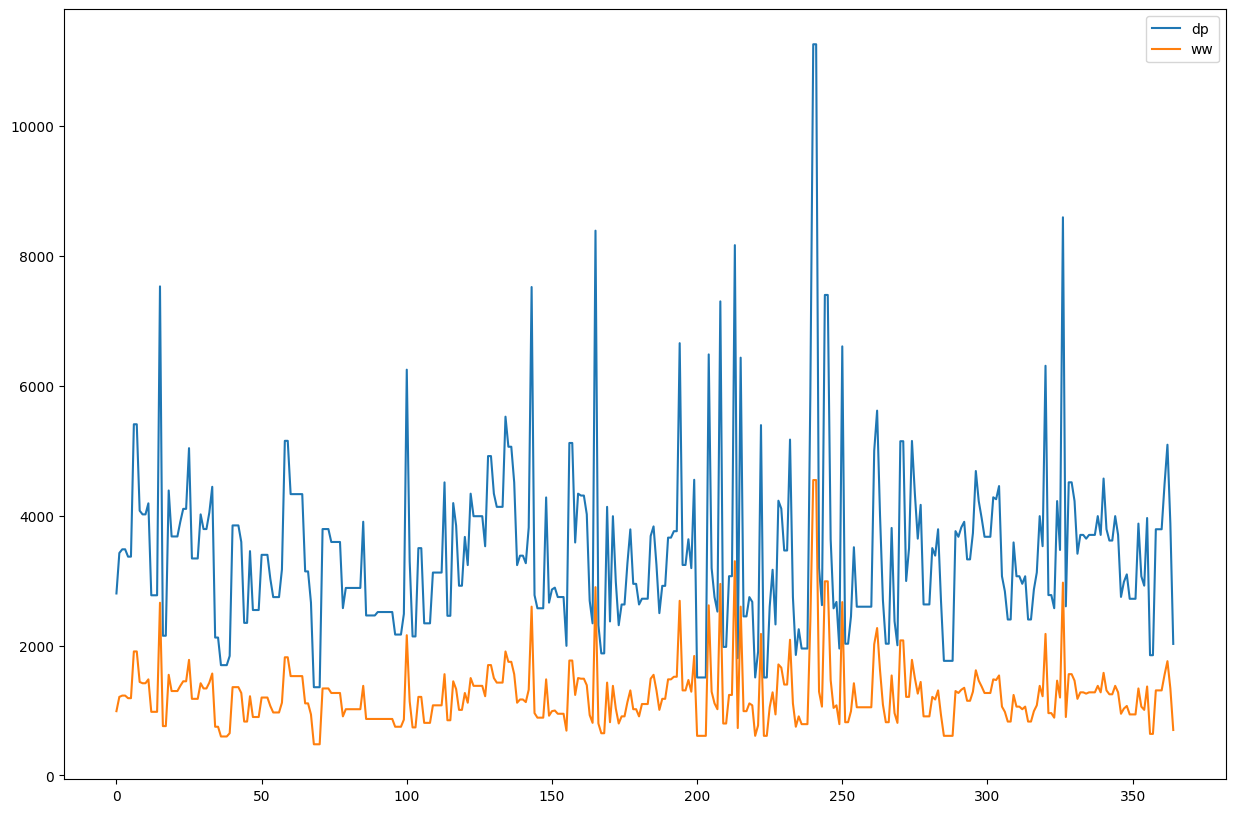

In [17]:
plt.figure(figsize=(15, 10))
plt.plot(waste_weight['daily patients'], label='dp')
plt.plot(waste_weight['waste weight'], label='ww')
plt.legend()
plt.show()

In [18]:
waste_weight = waste_weight.drop(columns=['quarter','quartly waste weight','proportion','Quarter','quarterly_patient_count'])
waste_weight

,Dump Date,waste weight,daily patients
0,2023-01-01,990,2803
1,2023-01-02,1210,3426
2,2023-01-03,1230,3483
3,2023-01-04,1230,3483
4,2023-01-05,1190,3370
...,...,...,...
360,2023-12-27,1310,3792
361,2023-12-28,1550,4486
362,2023-12-29,1760,5094
363,2023-12-30,1340,3879


In [19]:
waste_weight.to_excel('waste weight with patient count 2023.xlsx')